<a href="https://colab.research.google.com/github/Vashistsanskar/ml_models/blob/main/Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Advertising Budget and Sales.csv')

#This dataset contains 4 columns
- 1 -> money spend on TV advertisement`INPUT`
- 2 -> money spend on Radio advertisement`INPUT`
- 3 -> money spend on Newspaper advertisement`INPUT`
- 4 -> revenue of sales  `OUTPUT`


In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


#Sales has very strong relation with --> TV AD Budget
### Then Radio
###Then Newspaper

In [21]:
df.rename(columns={
    'TV Ad Budget ($)':'tv',
    'Radio Ad Budget ($)':'radio',
    'Newspaper Ad Budget ($)':'newspaper',
    'Sales ($)':'sales',
},inplace=True)

<Axes: xlabel='tv', ylabel='sales'>

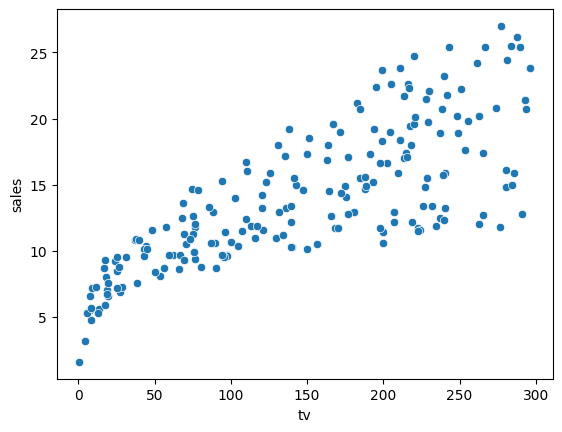

In [16]:
sns.scatterplot(data=df,x='tv',y='sales')

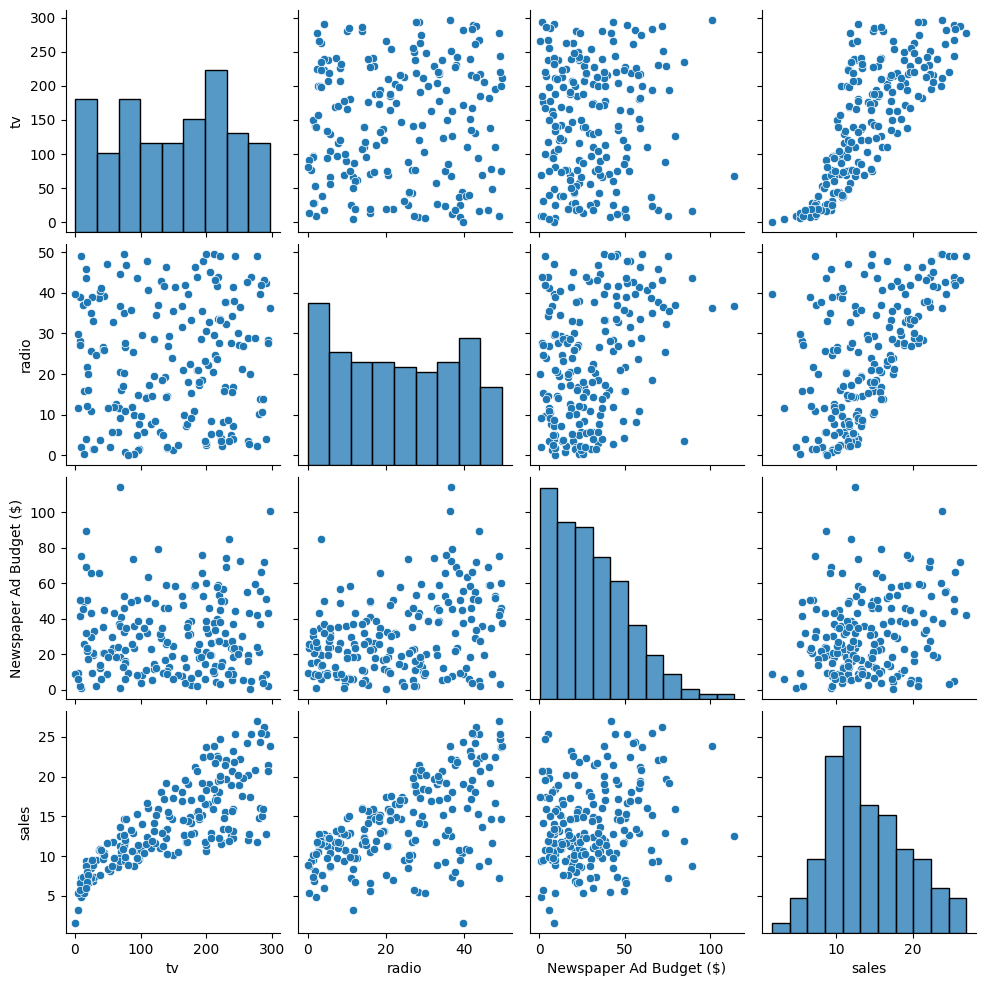

In [17]:
sns.pairplot(data=df)

In [22]:
df.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
#Applying Standaization on Newspaper column
from sklearn.preprocessing import StandardScaler

In [43]:
df.drop(columns='news_numpy',inplace=True)

In [44]:
df

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: >

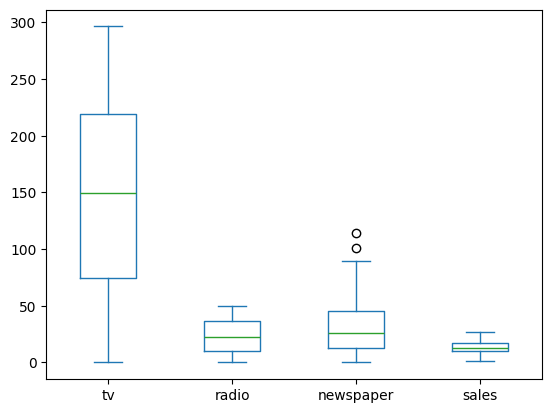

In [45]:
df.plot(kind='box')

#Handling Outliers

In [47]:
Q3 = df['newspaper'].quantile(0.75)
Q1 = df['newspaper'].quantile(0.25)

In [48]:
IQR = Q3-Q1

In [50]:
max_val = Q3 + 1.5* IQR

In [52]:
max_val

np.float64(93.625)

In [56]:
df = df[df['newspaper'] < max_val]

<Axes: >

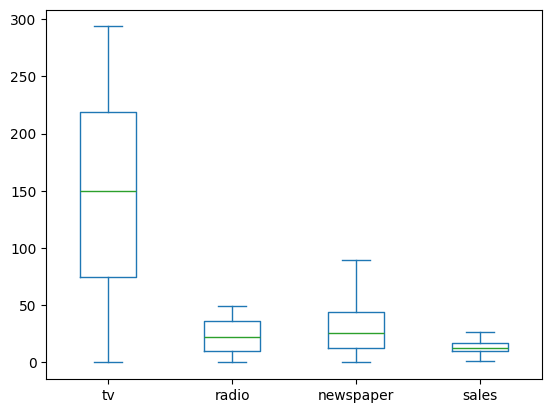

In [57]:
df.plot(kind='box')

In [58]:
df.describe()

,tv,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df[['tv','radio','newspaper']]
Y = df['sales']

In [62]:
#Standardizing
std = StandardScaler()
X = std.fit_transform(X)

In [63]:
X

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

In [65]:
X.shape,Y.shape

((198, 3), (198,))

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=4)

In [96]:
X_train.shape,X_test.shape

((148, 3), (50, 3))

In [97]:
y_train

,sales
85,15.2
17,24.4
20,18.0
2,9.3
144,11.4
...,...
106,7.2
131,12.7
185,22.6
176,20.2


In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lr = LinearRegression()

In [102]:
lr.fit(X_train,y_train)

LinearRegression()

In [103]:
y_pred = lr.predict(X_test)

In [104]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8621726482172966

In [105]:
X

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

In [106]:
Y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5
